## Linear Regression

With linear regression we try to find a line of best fit to some data. This can help us predict a numeric value. With gradient descent we can.

In [272]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
import numpy as np
import math

In [273]:
data = pd.read_csv("./data.csv")

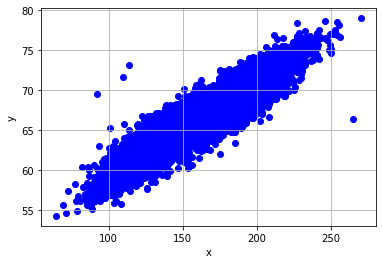

In [274]:
%matplotlib inline 
plt.scatter(data['Height'], data['Weight'], color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();

## The Math
The sum of squared errors is given by this function here. 

$ sse = \sum_{i=1}^n (y'-y)^2 = \sum_{i=1}^n (mx+b - y)^2$

If we take the derrivative of this function with respect to the slope (m) we get this.


$\frac{d}{dm} = (mx+b - y)^2 = \frac{d}{dm}[(mx+b -y)^2] =  2(mx+b - y)*\frac{d}{dm}[(mx+b-y)] = 2(mx+b -y)*x = 2(y'-y)x$

We can use this this to find the optimal coefficient value for the slope. This will help us find the value by telling us how big of the steps we should take to find the solution.

In [275]:
def get_derivative(X, y, m):
    return 2 * ( sum( (m * X - y) * X) )

In [276]:
def model(x, m, b=1):
    return x * m + b

In [277]:
def sse(m, X, y):
    X_pred = [model(m,x) for x in X]
    return sum( (X_pred - y)**2 )

In [278]:
def gradient_descent(data, m, b, l_rate, epochs=100):
    """
    This function will preform gradient descent
    """
    parameters = []
    y = data['Weight']
    X = data['Height']
    
    for i in range(epochs):
        m = m - l_rate * get_derivative(X, y, m)
        error = sse(m, X, y)
        if math.isnan(m) == False and math.isinf(m) == False:    
            parameters.append(m)
    return parameters

In [279]:
params = gradient_descent(data, m=-5, b=1, l_rate=0.01)
best_derivative = params[-1]
best_derivative

5.679008717397488e+303

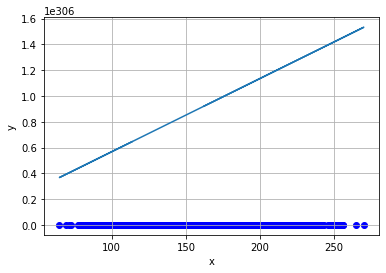

In [280]:
%matplotlib inline 
plt.scatter(data['Height'], data['Weight'], color='b')
plt.plot(data['Height'], 1 + best_derivative * data['Height'], '-')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();